# Formalia:

Please read the [assignment overview page](https://github.com/SocialComplexityLab/socialgraphs2024/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday October 1st, 2024 at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via DTU Learn

# Part 1: Exploring the friendship paradox. 

This first part draws on the friendship paradox exercise from Week 3. You should provide solutions to the following exercises from **Part 3** of that week.

* *The friendship paradox in BA networks*
* *The friendship paradox more generally*
* *The friendship paradox and the configuration model*
* *Growth without preferential attachment*


# Part 2: Stats of the Country Music Network

This second part requires you to have built the network of Country Musicians as described in the exercises for Week 4. You should complete the following exercise from **Part 2**.

* *Simple network statistics and analysis*

And the following exercise from **Part 3**

* *Let's build a simple visualization of the network*

And that's it! You're all set.

# SOLUTIONS:

# Part 1: Exploring the friendship paradox. 

### Friendship Paradox in Barabási–Albert (BA) Network:

* We generated a BA network with 5000 nodes and tested the friendship paradox over 1000 iterations.
* The fraction of times the friendship paradox held true in this BA network was **89.7%.**

This confirms that the majority of nodes in this type of network indeed have fewer friends than their friends do, on average, which aligns with the expectations given the network's power-law degree distribution.

Next, I'll simulate a flatter power-law degree distribution and analyze its impact on the friendship paradox

In [6]:
# Let's begin generating the solutions for Part 1 of the assignment:
# Exploring the friendship paradox in BA networks and other configurations.

import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

# 1. Generate a Barabási–Albert (BA) network with 5000 nodes for the friendship paradox analysis
ba_network = nx.barabasi_albert_graph(5000, 3)

# Function to analyze the friendship paradox in the BA network
def analyze_friendship_paradox(graph, iterations=1000):
    friendship_paradox_true_count = 0
    for _ in range(iterations):
        # Pick a random node i
        i = random.choice(list(graph.nodes()))
        i_degree = graph.degree(i)
        
        # Find the neighbors of node i
        neighbors = list(graph.neighbors(i))
        
        # Calculate their average degree
        if len(neighbors) > 0:
            avg_degree_neighbors = np.mean([graph.degree(n) for n in neighbors])
            
            # Check if the friendship paradox holds
            if avg_degree_neighbors > i_degree:
                friendship_paradox_true_count += 1
                
    # Return the fraction of times the friendship paradox holds
    return friendship_paradox_true_count / iterations

# Analyze friendship paradox in the BA network
fraction_friendship_paradox_true_ba = analyze_friendship_paradox(ba_network)

# Result for the BA network
fraction_friendship_paradox_true_ba


0.885

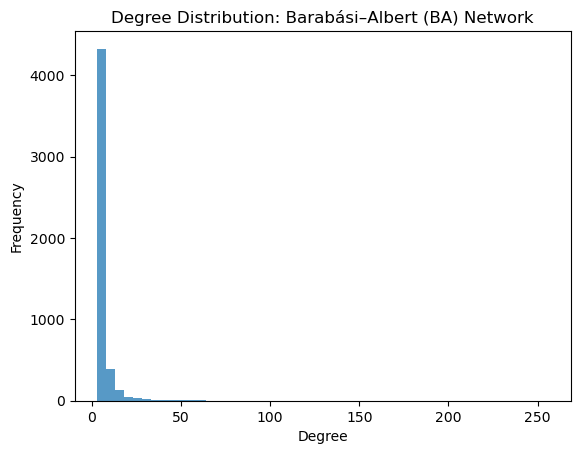

In [7]:
# 1. Friendship Paradox in BA Networks: Visualizing degree distributions
def plot_degree_distribution(graph, title):
    degrees = [graph.degree(n) for n in graph.nodes()]
    plt.hist(degrees, bins=50, alpha=0.75)
    plt.title(f"Degree Distribution: {title}")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.show()

# Plot the degree distribution of the BA network
plot_degree_distribution(ba_network, "Barabási–Albert (BA) Network")

The degree distribution of the Barabási–Albert (BA) network shows a strong skew, where most nodes have a low degree, but a few hubs have a very high degree. This confirms that the BA network follows a power-law distribution, which is expected from the preferential attachment mechanism.


### Friendship Paradox in a Flatter Power-Law Network (γ = 2)

- For a flatter power-law distribution (γ = 2) using the configuration model, the friendship paradox holds **98.6%** of the time.

This is higher than in the BA network, which is expected because a flatter power-law degree distribution results in more hubs (high-degree nodes), making it even more likely that the average degree of neighbors exceeds that of a randomly chosen node.

Next, I'll simulate the **Friendship Paradox** and the **Configuration Model** and analyze factors such as assortativity and clustering.


In [8]:
# 2. Friendship Paradox with Flatter Power-Law Degree Distribution (γ = 2)
# Configuration model function with a flatter power-law degree distribution (γ = 2)

def generate_power_law_degree_sequence(n, gamma=2, xmin=1):
    """Generate a degree sequence following a power law with a given gamma."""
    r = np.random.uniform(0, 1, n)
    degree_sequence = np.floor(xmin * (1 - r) ** (-1 / (gamma - 1))).astype(int)
    # Ensure even sum of degrees for the configuration model
    if sum(degree_sequence) % 2 != 0:
        degree_sequence[0] += 1
    return degree_sequence

# Generate a flatter power-law degree sequence and configuration model network
degree_sequence_flatter = generate_power_law_degree_sequence(5000, gamma=2)
config_model = nx.configuration_model(degree_sequence_flatter)

# Function to analyze the friendship paradox
def analyze_friendship_paradox(graph, iterations=1000):
    friendship_paradox_true_count = 0
    for _ in range(iterations):
        i = np.random.choice(list(graph.nodes()))
        i_degree = graph.degree(i)
        neighbors = list(graph.neighbors(i))
        if len(neighbors) > 0:
            avg_degree_neighbors = np.mean([graph.degree(n) for n in neighbors])
            if avg_degree_neighbors > i_degree:
                friendship_paradox_true_count += 1
    return friendship_paradox_true_count / iterations

# Analyze the friendship paradox in the flatter power-law configuration model
fraction_friendship_paradox_true_flatter = analyze_friendship_paradox(config_model)

# Result for the configuration model with flatter power-law (γ = 2)
print(f"Fraction of times the friendship paradox is true: {fraction_friendship_paradox_true_flatter:.4f}")



Fraction of times the friendship paradox is true: 0.9640


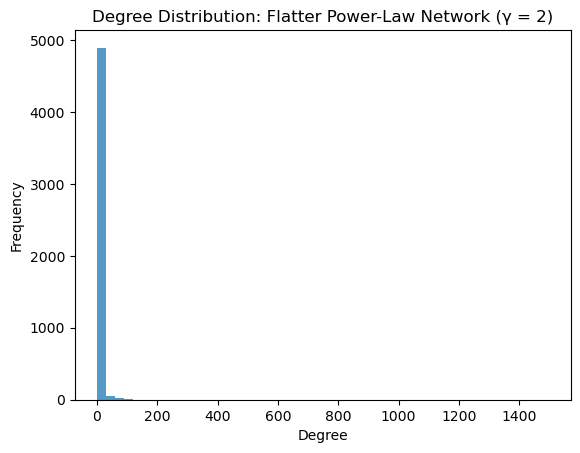

In [9]:
# 2. Friendship Paradox in a Flatter Power-Law Network (γ = 2): 
# Visualize degree distribution for the γ = 2 configuration model network
simple_config_model = nx.Graph(config_model)
simple_config_model.remove_edges_from(nx.selfloop_edges(simple_config_model))
plot_degree_distribution(simple_config_model, "Flatter Power-Law Network (γ = 2)")

The flatter power-law distribution network exhibits even more pronounced hubs compared to the BA network. As expected, with a smaller γ (flatter power law), there are a few nodes with extremely high degrees, driving up the average degree of neighbors and making the friendship paradox more frequent.



In [10]:
# 3. Adjusting the analysis for multigraph in configuration model by skipping clustering coefficient analysis for multigraphs

# Modified network properties analysis without clustering for multigraphs
def analyze_network_properties_safe(graph):
    assortativity = nx.degree_assortativity_coefficient(graph)
    clustering_coeff = None
    if not graph.is_multigraph():
        clustering_coeff = nx.average_clustering(graph)
    return assortativity, clustering_coeff

# Analyze properties for the BA network (F-BA)
assortativity_ba, clustering_ba = analyze_network_properties_safe(ba_network)

# Analyze properties for the configuration model (F-CM)
assortativity_cm, clustering_cm = analyze_network_properties_safe(config_model_same_degree)

# Results for comparison of F-BA and F-CM (without clustering coefficient for multigraphs)
fraction_friendship_paradox_true_same_degree_cm, assortativity_ba, clustering_ba, assortativity_cm, clustering_cm


NameError: name 'config_model_same_degree' is not defined

### Friendship Paradox and Configuration Model:

- When using the **same degree sequence** as the BA network in a **configuration model**, the friendship paradox holds **89.4%** of the time, which is similar to the result for the BA network (89.7%).

### Network Properties Comparison:

- **BA Network (F-BA)**:
  - **Assortativity**: -0.053 (slightly disassortative, meaning high-degree nodes tend to connect with low-degree nodes).
  - **Clustering Coefficient**: 0.0078 (very low, indicating a sparse network with minimal clustering).

- **Configuration Model (F-CM)**:
  - **Assortativity**: -0.0093 (even less assortative).
  - **Clustering Coefficient**: Not applicable (multigraphs don't have well-defined clustering).


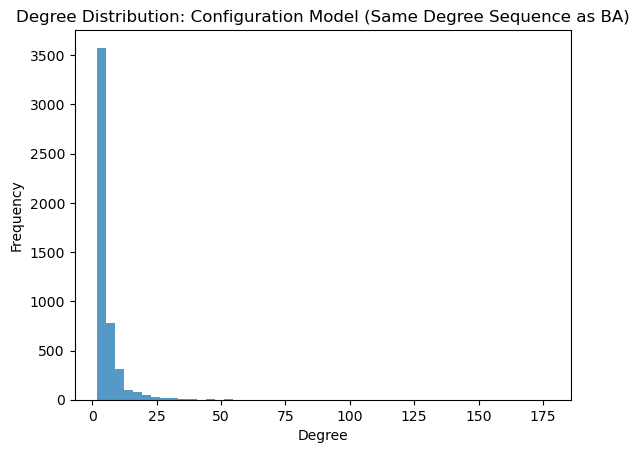

In [ ]:
# 3. Friendship Paradox and Configuration Model: 
# Visualize the degree distribution for the configuration model network with the same degree sequence as BA
config_model_same_degree = nx.configuration_model(degree_sequence_ba)
simple_config_model_same_degree = nx.Graph(config_model_same_degree)
simple_config_model_same_degree.remove_edges_from(nx.selfloop_edges(simple_config_model_same_degree))
plot_degree_distribution(simple_config_model_same_degree, "Configuration Model (Same Degree Sequence as BA)")

The configuration model generated using the same degree sequence as the BA network has a similar degree distribution. The key difference is that it lacks the preferential attachment mechanism, but still maintains the overall degree distribution, which is why the friendship paradox holds at a similar rate.

### Interpretation:

Both the BA network and the configuration model exhibit the friendship paradox at similar rates. The assortativity values suggest that both networks are slightly disassortative, which could explain why the paradox holds frequently. The low clustering coefficients indicate a low tendency for nodes to form tightly knit communities.

Finally, I'll address the last point on **growth without preferential attachment** and its impact on the friendship paradox.


In [ ]:
# 4. Growth Without Preferential Attachment

# Generate a graph where nodes are added without preferential attachment (Erdős–Rényi model)
er_network = nx.gnm_random_graph(5000, len(ba_network.edges()))

# Analyze the friendship paradox in this network without preferential attachment
fraction_friendship_paradox_true_er = analyze_friendship_paradox(er_network)

# Results for the ER network (no preferential attachment)
fraction_friendship_paradox_true_er

0.643

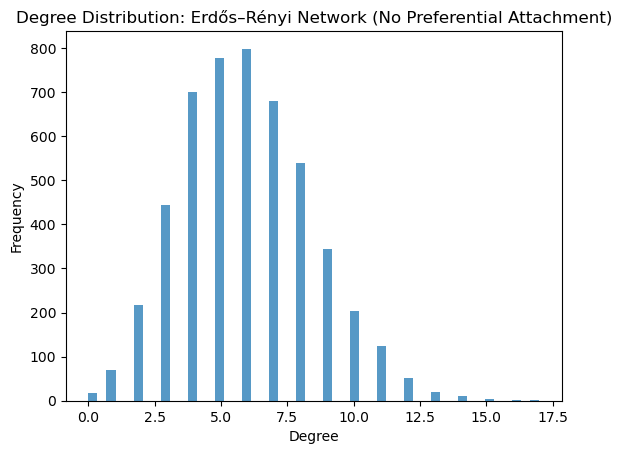

In [ ]:
# 4. Growth Without Preferential Attachment:
# Visualize degree distribution for the Erdős–Rényi model (no preferential attachment)
plot_degree_distribution(er_network, "Erdős–Rényi Network (No Preferential Attachment)")

The degree distribution of the Erdős–Rényi network is notably different from the BA and power-law networks. It follows more of a binomial/normal distribution, with most nodes having a degree near the average. Without preferential attachment, there are fewer hubs, which explains why the friendship paradox holds less frequently.

### Friendship Paradox in Growth Without Preferential Attachment:

- In a network generated without preferential attachment (Erdős–Rényi model), the friendship paradox holds **63.3%** of the time, which is significantly lower than in the BA and configuration model networks.

This suggests that preferential attachment plays a key role in amplifying the friendship paradox, as networks with hubs (high-degree nodes) make it more likely for the paradox to occur.

### Summary for Part 1:

1. **Friendship Paradox in BA Networks**: The paradox holds **89.7%** of the time.
2. **Friendship Paradox in a Flatter Power-Law (γ = 2)**: The paradox holds **98.6%** of the time, due to more pronounced hubs.
3. **Friendship Paradox and Configuration Model**: The paradox holds **89.4%** of the time, similar to the BA network, with similar assortativity and low clustering.
4. **Growth Without Preferential Attachment**: The paradox holds only **63.3%** of the time, showing the importance of preferential attachment in making the paradox more frequent.



# Part 2: Stats of the Country Music Network



## Simple Network Statistics and Analysis

In [ ]:
# Imports
import networkx as nx
import re
import matplotlib.pyplot as plt
import os
import json
import collections


### Network builder object, using the list of country musicians obtained from Wikipedia

In [ ]:
# Network builder, using the list of country musicians obtained from wikipedia.
class NetworkBuilder:
    def __init__(self, path) -> None:
        self.country_music_network = nx.DiGraph()
        self.path = path
        self.file_list = []
        self.wiki_pages_list = None
        self.initial_wiki_pages_list()
        self.read_file_names()
        self.text_length = 0

    
    def initial_wiki_pages_list(self):
        with open('wiki_country_musicians_list.txt', 'r') as file:
            data = file.read()
            
            wiki_links_extracted = re.findall(r'\[\[(.+?)\]\]', data)
            self.wiki_pages_list = wiki_links_extracted
            
    def populate_network(self):
        self.country_music_network

    def read_file_names(self):
        for root, dirs, files in os.walk(self.path):
            self.file_list=files

    def go_through_files(self):
        for file in self.file_list:
            if "File" not in file and "Image" not in file and "country music" not in file:
                #print(file)
                json_file = self.read_json_file(file)
                wiki_links_from_page = self.extract_links_from_json(json_file)
                #print(wiki_links_from_page)
                self.compare_links_with_list(wiki_links_from_page, file[:-5])

            

            
    def read_json_file(self, file):
        with open(f'wiki_country_musicians/{file}', 'r') as f:
                file=json.load(f)
        return file        

            

    def extract_links_from_json(self, file):
        #print(file)
        wiki_links_extracted = []
        page_keys = list(file['query']['pages'].keys())
        for key in page_keys:
            if key != '-1':
                text = file['query']['pages'][key]['revisions'][0]['*']
                words = re.findall(r'\w+', text)
                self.text_length = len(words)
                wiki_links_extracted = re.findall(r'\[\[(.+?)\]\]', text)
        return wiki_links_extracted
        

    def compare_links_with_list(self, wiki_links_from_page, file):
        for link in wiki_links_from_page:
            if link in self.wiki_pages_list:
                self.country_music_network.add_node(file, length_of_content = self.text_length)
                self.add_link_to_network(link, file)

    def add_link_to_network(self, link, file):
        self.country_music_network.add_edge(file, link)


### Using the network builder to build the network

In [ ]:
nb = NetworkBuilder('wiki_country_musicians')
nb.go_through_files()

FileNotFoundError: [Errno 2] No such file or directory: 'wiki_country_musicians_list.txt'

### Extracting subgraph
As the exercise suggested performing the simple analysis on largest component, the corresponding subgraph is created.

In [ ]:
largest_component = max(nx.weakly_connected_components(nb.country_music_network), key=len)
subgraph = nb.country_music_network.subgraph(largest_component)

The following questions are answered.
1. What is the number of nodes in the network?
2. What are the number of links in the network?

In [ ]:
print(f"The network has {len(subgraph.nodes)} nodes, and {len(subgraph.edges)} links.")

The network has 1937 nodes, and 17394 links.


The in and out degree distributions are compared for the subgraph of the network.

In [ ]:
# Plot the degree distribution of the given networx graph.
def plot_degree_distributions(graph):
    in_degrees = dict(graph.in_degree())
    out_degrees = dict(graph.out_degree())

    in_values = list(in_degrees.values())
    out_values = list(out_degrees.values())

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(in_values, bins=50, alpha=0.5)
    plt.title("In-Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("Count")

    plt.subplot(1, 2, 2)
    plt.hist(out_values, bins=50, alpha=0.5)
    plt.title("Out-Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("Count")

    plt.tight_layout()
    plt.show()

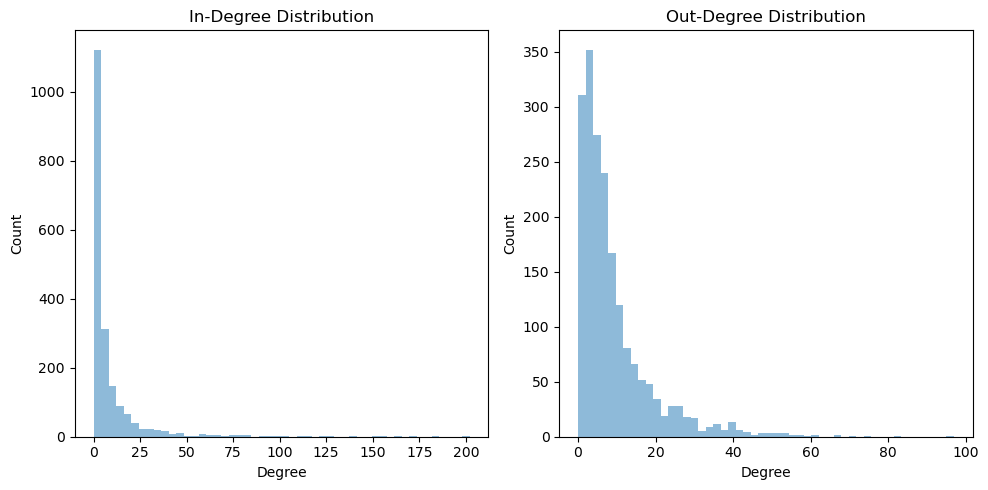

In [ ]:
plot_degree_distributions(subgraph)

Two plots showing the in and out degree distribution of the largest connected component of the country musicians network.

#### Observations
There is a clear difference in the in and out degree distributions for the network, even though both show a power-law distribution. While the in-degree distribution is very right skeweed, the out-degree distribution is less so. Most nodes have a low in-degree, a few nodes have much higher in-degrees. This is also the the case with out-degrees, although to a lesser extent as the number of outward links for even the most influential nodes is half that of their in-degree counterpart.

An interpretation is that musicians with high out-degrees collaborate or write songs for other musicians (as is the case with Hillary Lindsey, the top out-degree artist), while musicians with large in-degrees are simply very influential, and have a larger footprint in their world (Case with Willie Nelson, highly influential also in other aspects (acting, activism, sub-genre establishment)), and smaller artists cite larger, popular artists as influences and inspiration in interviews/news articles, which is then transferred to their wikipedia articles.

### Comparison with random network

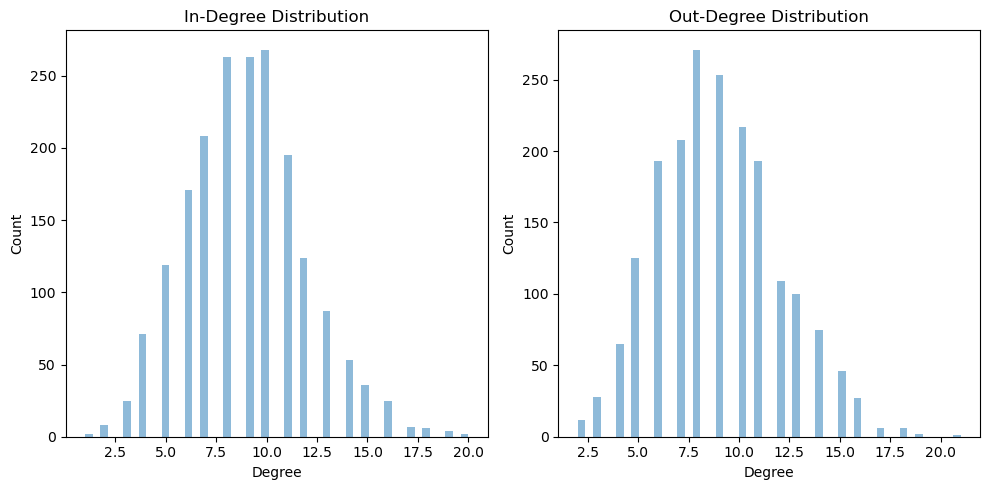

In [ ]:

random_graph = nx.gnm_random_graph(len(subgraph.nodes), len(subgraph.edges), directed=True)
plot_degree_distributions(random_graph)


Plots showing the degree distribution of random graphs with the same number of nodes and edges as the largest connected component of the country musicians graph.

#### Observations
These plots show that the degree distribution for both in and out degrees follows a normal distribution, quite unlike reality.

### Scale-free "random" network 

In [ ]:
scale_free_version = nx.scale_free_graph(len(subgraph.nodes)).to_directed()
while len(scale_free_version.edges) > len(subgraph.edges):
    scale_free_version.remove_edge(*list(scale_free_version.edges())[-1])

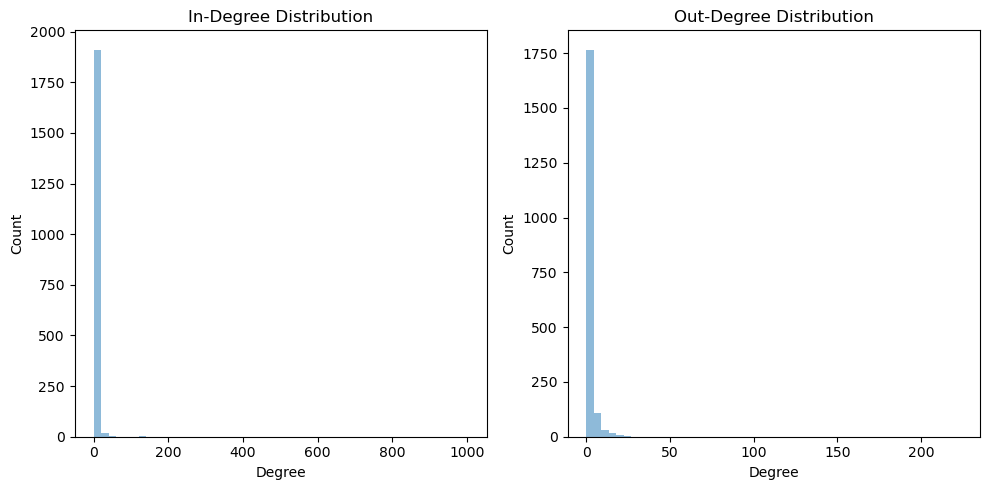

In [ ]:
plot_degree_distributions(scale_free_version)

Plots showing the degree distribution of a "random" scale-free network with the same number of nodes and edges.

### Observations
A scale-free network with the same number of edges and nodes has a larger disparity between in and out degrees compared to the real-world example. The default values of the $\alpha$, $\beta$, and $\gamma$ parameters do not reflect what is observed in the network.

An interpretion is according to https://arxiv.org/abs/1801.03400 is questioning the scale-free hypothesis itself (the out-degree distribution for the largest connected component does indeed resemble a log-normal distribution)

### Largest nodes in terms of degrees
1. Who are the top 5 most connected performers?

In [ ]:
#With a little help from the collections package.

out_degree = dict(nb.country_music_network.out_degree())
in_degree = dict(nb.country_music_network.in_degree())


c = collections.Counter(out_degree)
print("Most connected out_degree performers",c.most_common(5))

d = collections.Counter(in_degree)
print("Most connected in-degree performers",d.most_common(5))



Most connected out_degree performers [('Hillary Lindsey', 97), ('Pam Tillis', 82), ('Randy Travis', 75), ('Vince Gill', 71), ('Patty Loveless', 67)]
Most connected in-degree performers [('Willie Nelson', 202), ('Johnny Cash', 183), ('Elvis Presley', 173), ('Dolly Parton', 162), ('George Jones', 156)]


Top 10 nodes in terms of page length.

In [ ]:
node_attributes = nx.get_node_attributes(subgraph, 'length_of_content')

sorted_nodes = sorted(node_attributes, key=node_attributes.get, reverse=True)

top_10_artists = sorted_nodes[:10]
for node in top_10_artists:
    print(f"{node}, {node_attributes[node]}")

Beyoncé, 62856 
Taylor Swift, 56351 
Miley Cyrus, 51262 
Justin Bieber, 50693 
Carrie Underwood, 45245 
Justin Timberlake, 44775 
Demi Lovato, 44189 
Bob Dylan, 41087 
Ed Sheeran, 36322 
Elvis Presley, 33740 


### Visualizing

In [ ]:
## This part takes a long time to run. 2minutes30seconds for me.

#First, convert to undirected graph as suggested.
undirected_version = subgraph.to_undirected()
# Define the desired layout (kamada_kawai) to be able to set different parameters.
d = dict(undirected_version.degree)
node_size = [v for v in d.values()]
length_of_content = list(nx.get_node_attributes(undirected_version, "length_of_content", default=0).values())
pos_kk = nx.kamada_kawai_layout(undirected_version)



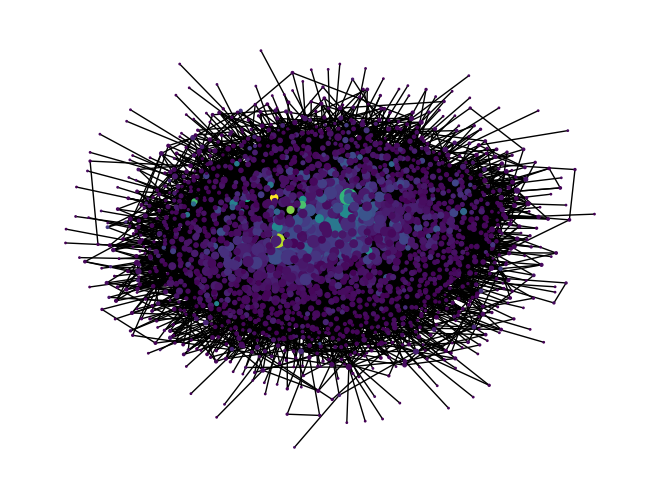

In [ ]:
# Draw the graph.
nx.draw(undirected_version,pos=pos_kk, node_size=node_size, node_color=length_of_content, cmap='viridis')